# 50 Startup Assignment python , Linear , ridge , lasso elastic net 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model 
from sklearn.linear_model import ridge_regression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso

In [6]:
data = pd.read_csv('50_Startups.csv')

In [8]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Data pre processing 

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [12]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [14]:
data.var()

R&D Spend          2.107017e+09
Administration     7.849973e+08
Marketing Spend    1.495492e+10
Profit             1.624588e+09
dtype: float64

In [17]:
data.isnull().sum() # there is no missing value 

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [18]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Exploratory data annalysis

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


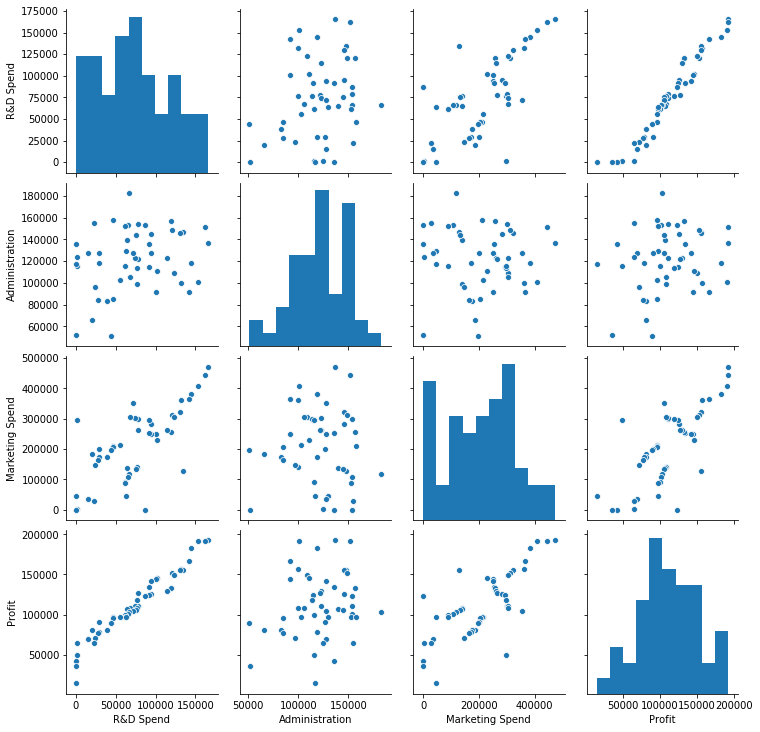

In [19]:
import seaborn as sns 
sns.pairplot(data)

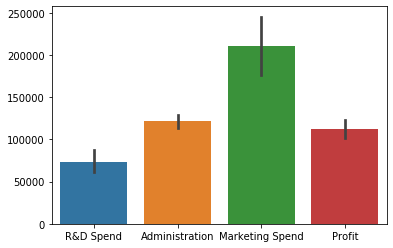

In [20]:
sns.barplot(data=data) # visual representaion of each variable 


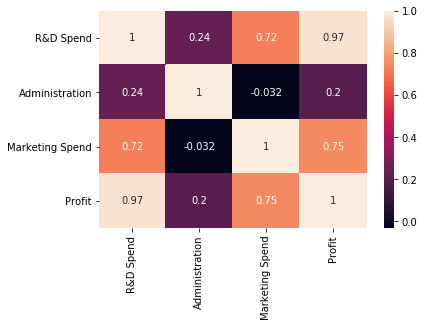

In [21]:
sns.heatmap(data.corr(),annot=True) # it representing positive and negative correaltoin 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CAB95AEDC8>,
      dtype=object)

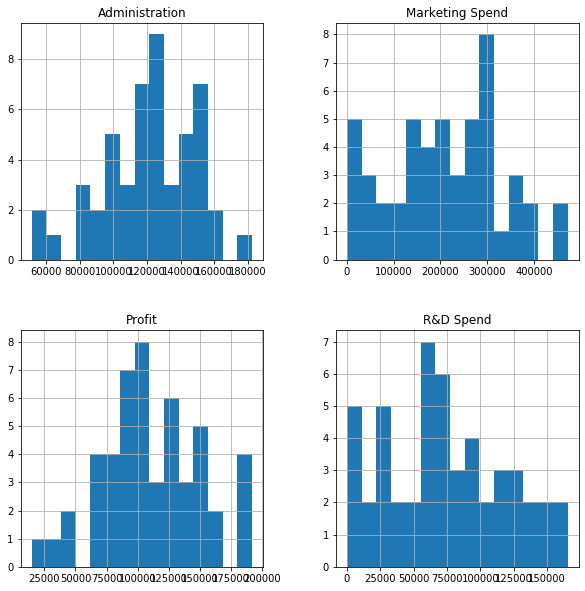

In [22]:
data.hist(bins=15,figsize=(10,10))

In [23]:
data.keys() # key column visualization 

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [25]:
data.shape

(50, 5)

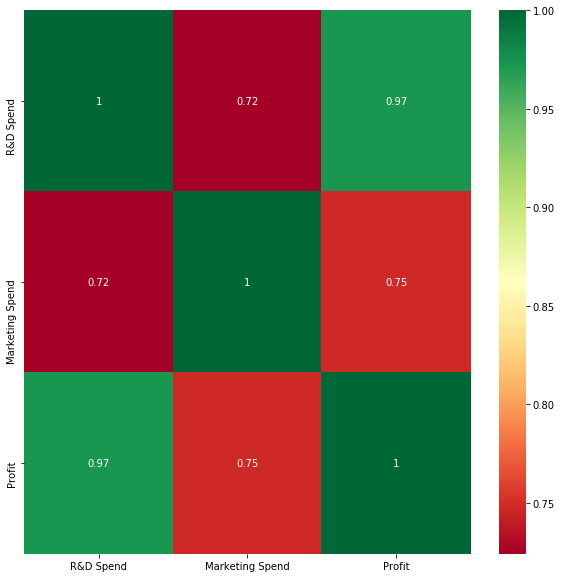

In [27]:
# Most correlated variables to clean outliers
corrmat = data.corr()
top_corr_features = corrmat.index[abs(corrmat["Profit"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [38]:
X = data[['R&D Spend', 'Administration', 'Marketing Spend',]]
y = data[[ 'Profit']]

In [39]:
#Firstly setting up of our train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state =1)

# Model Building 

#### Linear model making 

In [29]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [31]:
#Create linear regression 
lm = linear_model.LinearRegression()

In [40]:
#Train the model using the training sets
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
# Make predictions using the testing set
y_pred = lm.predict(X_test)
print('The accuracy of the Linear Regression is',r2_score(y_test,y_pred))
print ('RMSE is: ', mean_squared_error(y_test, y_pred))

The accuracy of the Linear Regression is 0.9650940934427324
RMSE is:  79195300.7280719


In [47]:
lm.coef_
#lm.intercept_

array([[ 0.7742023 , -0.00877164,  0.02934891]])

# Ridge Regression 

In [49]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [51]:
rm = linear_model.Ridge()

In [52]:
#Train the model using the training sets
rm.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [53]:
# Make predictions using the testing set
y_pred = rm.predict(X_test)
print('The accuracy of the Ridge Regression is',r2_score(y_test,y_pred))
print ('RMSE is: ', mean_squared_error(y_test, y_pred))

The accuracy of the Ridge Regression is 0.9650940934395877
RMSE is:  79195300.73520666


In [55]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

8949.832282183112
0.94240260741009
8899.174159895045
0.9650940934427008


# Lasso Regression 

In [54]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [57]:
las = linear_model.Lasso()

In [58]:
#Train the model using the training sets
las.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [59]:
# Make predictions using the testing set
y_pred = las.predict(X_test)
print('The accuracy of the Ridge Regression is',r2_score(y_test,y_pred))
print ('RMSE is: ', mean_squared_error(y_test, y_pred))

The accuracy of the Ridge Regression is 0.9650940935432861
RMSE is:  79195300.49993357


In [60]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

8949.832282183113
0.94240260741009
8899.174159817747
0.9650940934433072


# Elastic Net Regression

In [61]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [62]:
el = linear_model.ElasticNet()

In [63]:
#Train the model using the training sets
el.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [64]:
# Make predictions using the testing set
y_pred = el.predict(X_test)
print('The accuracy of the Ridge Regression is',r2_score(y_test,y_pred))
print ('RMSE is: ', mean_squared_error(y_test, y_pred))

The accuracy of the Ridge Regression is 0.9650940934043793
RMSE is:  79195300.8150883


In [65]:
#Elastic Net
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

8949.832282183112
0.94240260741009
8899.174159963093
0.965094093442167
